In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

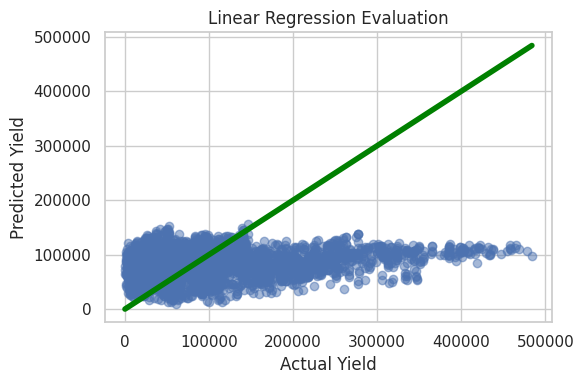

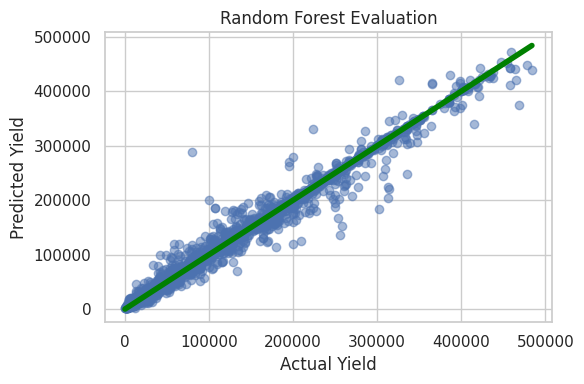

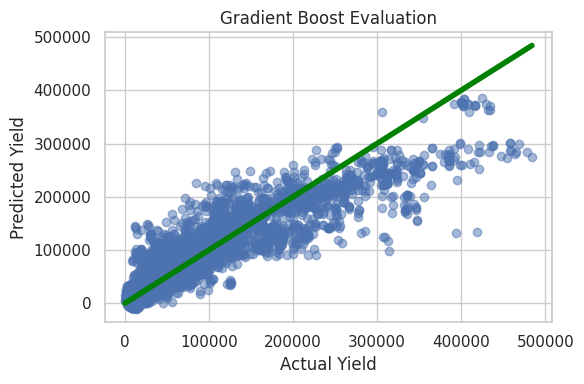

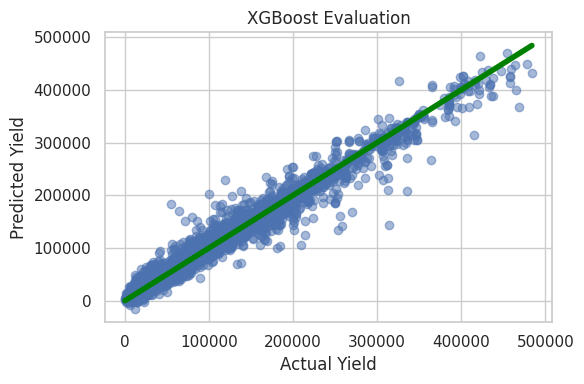

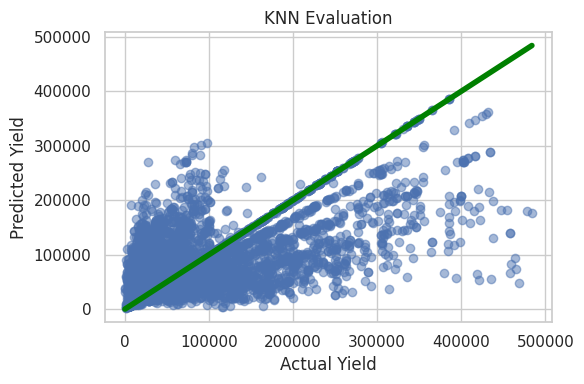

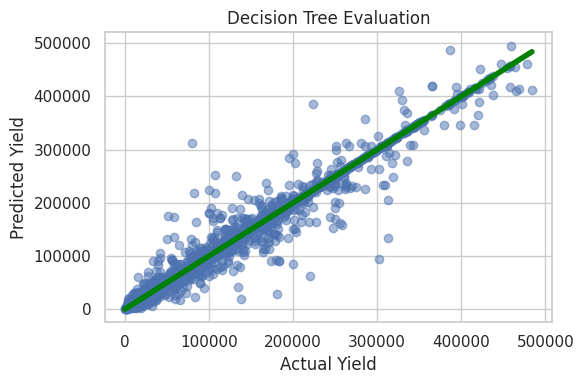

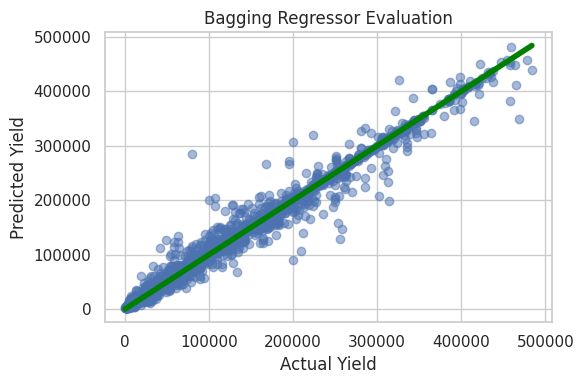

{'Linear Regression': {'Train R²': 0.08308435331236985,
  'Test R²': 0.08430699392297747,
  'Model': LinearRegression()},
 'Random Forest': {'Train R²': 0.9982189618188233,
  'Test R²': 0.9869212873381495,
  'Model': RandomForestRegressor(random_state=42)},
 'Gradient Boost': {'Train R²': 0.8352545339579257,
  'Test R²': 0.8340023868441611,
  'Model': GradientBoostingRegressor(random_state=42)},
 'XGBoost': {'Train R²': 0.9852693676948547,
  'Test R²': 0.974780261516571,
  'Model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_

In [22]:
df_encoded = pd.read_csv('/content/yield_df.csv')
label_encoders = {}
for col in ['Area', 'Item']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop(columns=['hg/ha_yield'])
y = df_encoded['hg/ha_yield']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boost": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42)
}

# Train, evaluate and plot
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    results[name] = {"Train R²": train_score, "Test R²": test_score, "Model": model}

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.title(f'{name} Evaluation')
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

results

In [23]:
import pandas as pd

# Convert results to DataFrame
results_df = pd.DataFrame([
    {"Model": name, "Train R² Score": values["Train R²"], "Test R² Score": values["Test R²"]}
    for name, values in results.items()
])

# Sort by Test R² Score
results_df = results_df.sort_values(by="Test R² Score", ascending=False).reset_index(drop=True)

# Highlight max and min in 'Test R² Score'
def highlight_extremes(val):
    if val == results_df['Test R² Score'].max():
        return 'background-color: lightgreen'
    elif val == results_df['Test R² Score'].min():
        return 'background-color: salmon'
    return ''

# Apply styling
styled_df = results_df.style.applymap(highlight_extremes, subset=['Test R² Score'])

# To display in Jupyter/Colab
styled_df


/tmp/ipython-input-1694838768.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = results_df.style.applymap(highlight_extremes, subset=['Test R² Score'])


,Model,Train R² Score,Test R² Score
0,Random Forest,0.998219,0.986921
1,Bagging Regressor,0.997176,0.985444
2,Decision Tree,1.000000,0.976653
3,XGBoost,0.985269,0.974780
4,Gradient Boost,0.835255,0.834002
5,KNN,0.624074,0.410003
6,Linear Regression,0.083084,0.084307


In [24]:
# Get feature names from training data
feature_names = X_train.columns

# Generate a random input with matching structure
random_input = {
    feature: np.random.uniform(X_train[feature].min(), X_train[feature].max())
    if X_train[feature].dtype != 'int64' else
    np.random.randint(X_train[feature].min(), X_train[feature].max() + 1)
    for feature in feature_names
}

# Convert to DataFrame for prediction
random_sample = pd.DataFrame([random_input])

# Predict yield
best_model = results['Random Forest']['Model']
predicted_yield = best_model.predict(random_sample)[0]

# Classify as 'Yes' or 'No' based on median
yield_median = y.median()
yield_class = "Yes" if predicted_yield >= yield_median else "No"

# Display nicely
print("\n🧪 Random Input Sample:")
for key, value in random_input.items():
    print(f"  {key}: {value:.2f}" if isinstance(value, float) else f"  {key}: {value}")

print("\n📈 Prediction Result:")
print(f"  Predicted Yield         : {predicted_yield:.2f}")
print(f"  Yield Median (Reference): {yield_median:.2f}")
print(f"  Yield Classification    : {'✅ Yes' if yield_class == 'Yes' else '❌ No'}")



🧪 Random Input Sample:
  Unnamed: 0: 8135
  Area: 22
  Item: 1
  Year: 1994
  average_rain_fall_mm_per_year: 1606.21
  pesticides_tonnes: 177773.58
  avg_temp: 3.83

📈 Prediction Result:
  Predicted Yield         : 34151.16
  Yield Median (Reference): 38295.00
  Yield Classification    : ❌ No


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


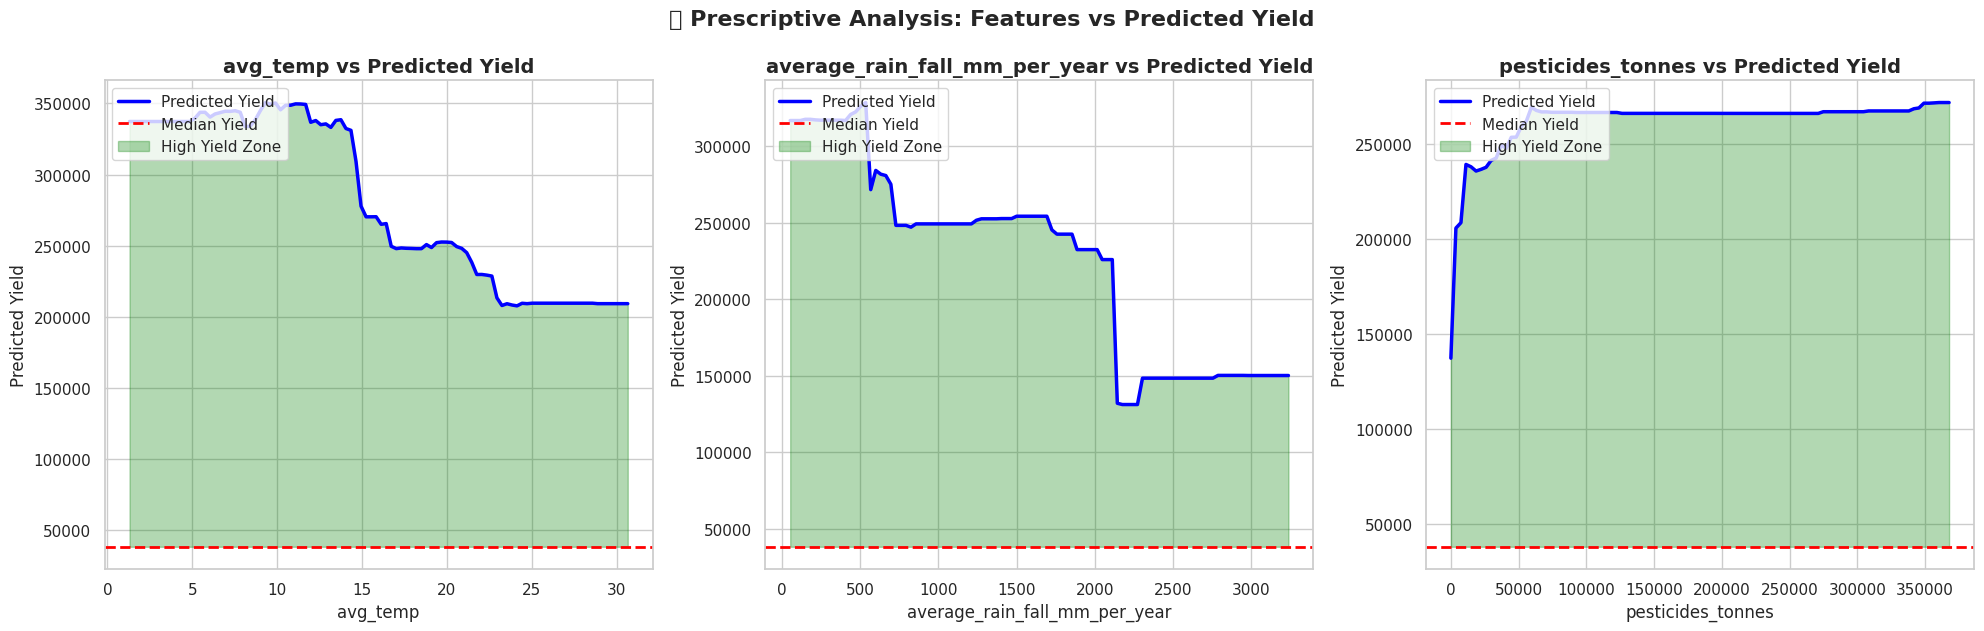


📌 Prescriptive Recommendations for High Yield:
  ✔️ Maintain avg_temp between 1.3 and 30.65
  ✔️ Maintain average_rain_fall_mm_per_year between 51.0 and 3240.0
  ✔️ Maintain pesticides_tonnes between 0.04 and 367778.0


In [25]:
features_to_vary = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_tonnes']
fixed_input = X_train.mean().to_dict()
for feature in ['Area', 'Item', 'Year']:
    fixed_input[feature] = int(X_train[feature].mode()[0])

# Visualization
sns.set(style="whitegrid")
high_yield_ranges = {}
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for idx, feature in enumerate(features_to_vary):
    feature_range = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    predictions = []

    for val in feature_range:
        sample = fixed_input.copy()
        sample[feature] = val
        pred = best_model.predict(pd.DataFrame([sample]))[0]
        predictions.append(pred)

    predictions = np.array(predictions)

    ax = axes[idx]
    sns.lineplot(x=feature_range, y=predictions, ax=ax, color="blue", linewidth=2.5, label="Predicted Yield")
    ax.axhline(y=yield_median, color='red', linestyle='--', linewidth=2, label='Median Yield')

    # Shade high-yield zone
    ax.fill_between(feature_range, predictions, yield_median,
                    where=predictions >= yield_median, interpolate=True, color='green', alpha=0.3, label='High Yield Zone')

    # Axis formatting
    ax.set_title(f'{feature} vs Predicted Yield', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Predicted Yield', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True)

    # Capture high-yield value range
    high_vals = feature_range[predictions >= yield_median]
    if len(high_vals) > 0:
        high_yield_ranges[feature] = (round(high_vals.min(), 2), round(high_vals.max(), 2))
    else:
        high_yield_ranges[feature] = "No high yield range"

plt.tight_layout()
plt.suptitle("📈 Prescriptive Analysis: Features vs Predicted Yield", fontsize=16, fontweight='bold', y=1.05)
plt.show()

# Print final recommendations
print("\n📌 Prescriptive Recommendations for High Yield:")
for feature, value in high_yield_ranges.items():
    if isinstance(value, tuple):
        print(f"  ✔️ Maintain {feature} between {value[0]} and {value[1]}")
    else:
        print(f"  ❌ {feature}: {value}")